In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<span style="color:blue;font-weight:bold"> Correlation  </span>
             
Correlation is used to test if two attributes have any relationship among themselves. Correlation coefficient is a term that is usually used to show the strength of correlation between these two variables.

+1 : Positively correlated (directly related, increase in one causes increase in other) <br>
-1 : Negatively correlated (Indirectly related, increase in one leads to decrease in other)  <br>
0 : No correlation coefficient values nearer to +1 or -1 indicate stronger correlation  <br>

<span style="color:blue;font-weight:bold">  Positive Correlation  </span>

A perfectly positive correlation means that 100% of the time, the variables in question move together by the exact same percentage and direction. A positive correlation can be seen between the demand for a product and the product's associated price. In situations where the avaiable supply stays the same, the price will rise if demand increases.

In [2]:
np.random.seed(1)
pc_df = pd.DataFrame()

In [3]:
pc_df['x'] = np.random.randint(0,50,100)

In [4]:
pc_df['y'] = pc_df['x'] + np.random.normal(0,5,100)

In [5]:
corr = pc_df['x'].corr(pc_df['y'])

In [6]:
corr

0.9377576725809027

In [7]:
print(f"Correlation between x and y is {round(corr,2)}")

Correlation between x and y is 0.94


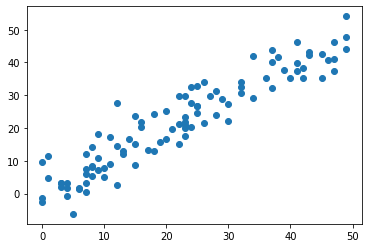

Each value in y is MORE THAN each value in x, where i is any number between [0,5]


In [8]:
plt.scatter(pc_df['x'],pc_df['y'])
plt.show()
print('Each value in y is MORE THAN each value in x, where i is any number between [0,5]')

<hr style="color:tomato;border:2px solid yellow" >

<span style="color:blue;font-weight:bold">  Negative Correlation  </span>

A perfect negative correlation means the relationship that exists between two variables is negative 100% of the time.Negative correlation is a key concept in portfolio construction, as it enables the creation of diversified portfolios that can better withstand portfolio volatility and smooth out returns. Correlation between two variables can vary widely over time. Stocks generally have negative correlation.

Correlation between x and y :-0.71


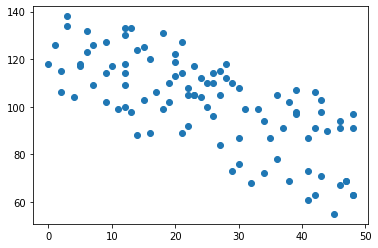

In [9]:
nc_df = pd.DataFrame()
nc_df['x'] = np.random.randint(0,50,100)
nc_df['y'] = 100 - nc_df['x'] + np.random.randint(0,50,100)
corr = nc_df['x'].corr(nc_df['y'])
print(f"Correlation between x and y :{round(corr,2)}")
plt.scatter(nc_df['x'],nc_df['y'])
plt.show()

<span style="color:blue;font-weight:bold"> No/weak Correlation </span>

A weak correlation means that as one variable increases or decreases, there is a lower likelihood of there being a relationship with the second variable.

In [10]:
wk_df = pd.DataFrame()
wk_df['x'] = np.random.randint(0,50,100)
wk_df['y'] = np.random.normal(0,50,100)

In [11]:
corr = wk_df['x'].corr(wk_df['y'] )
corr

0.10954971787938182

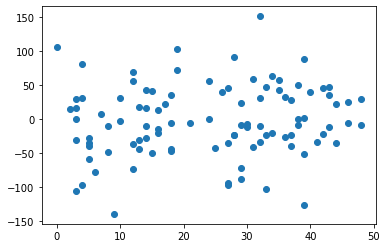

In [12]:
plt.scatter(wk_df['x'],wk_df['y'])
plt.show()

In [13]:
wine_quality = pd.read_csv(r'E:\SupervisedLearning\datasets\winequality-red.csv')

In [14]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


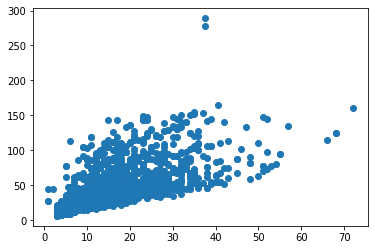

In [15]:
x = wine_quality['free sulfur dioxide']
y = wine_quality['total sulfur dioxide']
plt.scatter(x,y)
plt.show()

In [16]:
corr = wine_quality.corr()

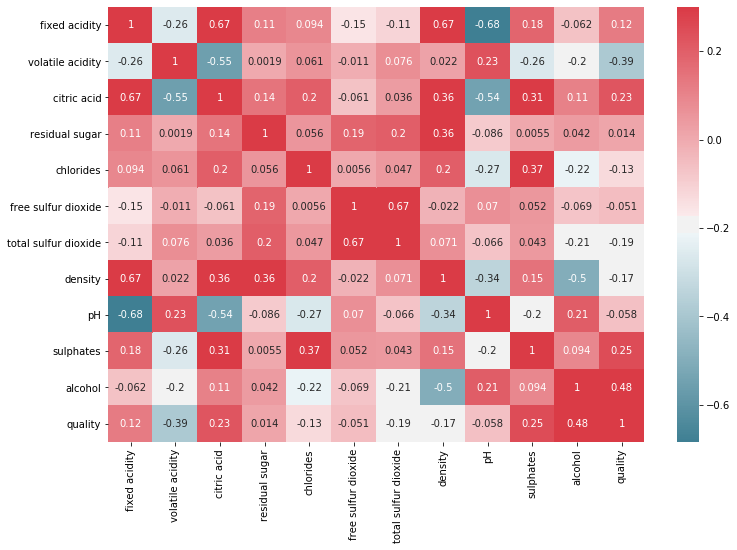

In [23]:
plt.figure(figsize=(12,8))
# cmap = sns.diverging_palette()
cmap = sns.diverging_palette(220,10,as_cmap=True,)
sns.heatmap(corr,annot=True,cmap=cmap,vmax=0.3)
    
# plt.xticks(rotation=50)
plt.show()

By default, corr() gives pearsons correlation coefficient <br>
To calculate spearman coefficient use <span style="font-weight:bold">'method=spearman'</span>

In [ ]:
help(wine_quality.corr)

In [ ]:
pearson_corr = wine_quality['free sulfur dioxide'].corr(wine_quality['density'])
spearman_corr = wine_quality['free sulfur dioxide'].corr(wine_quality['density'], method='spearman')

print(f"pearson_corr {pearson_corr}")
print(f"spearman_corr {spearman_corr}")